In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

from sklearn import tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

import pydotplus
import collections

from sklearn import preprocessing

In [2]:
train_data = pd.read_csv('C:/Users/prath/OneDrive/Desktop/Train_data.csv')
test_data = pd.read_csv('C:/Users/prath/OneDrive/Desktop/Test_data.csv')

In [3]:
print(train_data.head())

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


In [4]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3598 entries, 0 to 3597
Data columns (total 17 columns):
age          3598 non-null int64
job          3598 non-null object
marital      3598 non-null object
education    3598 non-null object
default      3598 non-null object
balance      3598 non-null int64
housing      3598 non-null object
loan         3598 non-null object
contact      3598 non-null object
day          3598 non-null int64
month        3598 non-null object
duration     3598 non-null int64
campaign     3598 non-null int64
pdays        3598 non-null int64
previous     3598 non-null int64
poutcome     3598 non-null object
y            3598 non-null object
dtypes: int64(7), object(10)
memory usage: 478.0+ KB
None


In [5]:
label_encoder = preprocessing.LabelEncoder()
train_data['poutcome'] = label_encoder.fit_transform(train_data['poutcome'])
train_data['housing'] = label_encoder.fit_transform(train_data['housing'])
train_data['loan'] = label_encoder.fit_transform(train_data['loan'])
train_data['contact'] = label_encoder.fit_transform(train_data['contact'])
train_data['default'] = label_encoder.fit_transform(train_data['default'])
train_data['marital'] = label_encoder.fit_transform(train_data['marital'])
train_data['education'] = label_encoder.fit_transform(train_data['education'])
train_data['job'] = label_encoder.fit_transform(train_data['job'])

In [6]:
test_data['poutcome'] = label_encoder.fit_transform(test_data['poutcome'])
test_data['housing'] = label_encoder.fit_transform(test_data['housing'])
test_data['loan'] = label_encoder.fit_transform(test_data['loan'])
test_data['contact'] = label_encoder.fit_transform(test_data['contact'])
test_data['default'] = label_encoder.fit_transform(test_data['default'])
test_data['marital'] = label_encoder.fit_transform(test_data['marital'])
test_data['education'] = label_encoder.fit_transform(test_data['education'])
test_data['job'] = label_encoder.fit_transform(test_data['job'])

In [7]:
train_data.loc[(train_data.month == "jan"), 'month'] = 1
train_data.loc[(train_data.month == "feb"), 'month'] = 2
train_data.loc[(train_data.month == "mar"), 'month'] = 3
train_data.loc[(train_data.month == "apr"), 'month'] = 4
train_data.loc[(train_data.month == "may"), 'month'] = 5
train_data.loc[(train_data.month == "jun"), 'month'] = 6
train_data.loc[(train_data.month == "jul"), 'month'] = 7
train_data.loc[(train_data.month == "aug"), 'month'] = 8
train_data.loc[(train_data.month == "sep"), 'month'] = 9
train_data.loc[(train_data.month == "oct"), 'month'] = 10
train_data.loc[(train_data.month == "nov"), 'month'] = 11
train_data.loc[(train_data.month == "dec"), 'month'] = 12

test_data.loc[(test_data.month == "jan"), 'month'] = 1
test_data.loc[(test_data.month == "feb"), 'month'] = 2
test_data.loc[(test_data.month == "mar"), 'month'] = 3
test_data.loc[(test_data.month == "apr"), 'month'] = 4
test_data.loc[(test_data.month == "may"), 'month'] = 5
test_data.loc[(test_data.month == "jun"), 'month'] = 6
test_data.loc[(test_data.month == "jul"), 'month'] = 7
test_data.loc[(test_data.month == "aug"), 'month'] = 8
test_data.loc[(test_data.month == "sep"), 'month'] = 9
test_data.loc[(test_data.month == "oct"), 'month'] = 10
test_data.loc[(test_data.month == "nov"), 'month'] = 11
test_data.loc[(test_data.month == "dec"), 'month'] = 12

In [8]:
print(train_data.head())

   age  job  marital  education  default  balance  housing  loan  contact  \
0   30   10        1          0        0     1787        0     0        0   
1   33    7        1          1        0     4789        1     1        0   
2   35    4        2          2        0     1350        1     0        0   
3   30    4        1          2        0     1476        1     1        2   
4   59    1        1          1        0        0        1     0        2   

   day  month  duration  campaign  pdays  previous  poutcome   y  
0   19     10        79         1     -1         0         3  no  
1   11      5       220         1    339         4         0  no  
2   16      4       185         1    330         1         0  no  
3    3      6       199         4     -1         0         3  no  
4    5      5       226         1     -1         0         3  no  


In [9]:
print('\nShape of training data :',train_data.shape)
print('\nShape of testing data :',test_data.shape)


Shape of training data : (3598, 17)

Shape of testing data : (923, 17)


In [10]:
train_x = train_data.drop(columns=['y'],axis=1)
train_y = train_data['y']

In [11]:
test_x = test_data.drop(columns=['y'],axis=1)
test_y = test_data['y']

In [12]:
model = DecisionTreeClassifier()

In [13]:
model.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [14]:
print('Depth of the Decision Tree :', model.get_depth())

Depth of the Decision Tree : 21


In [15]:
predict_train = model.predict(train_x)
print('Target on train data',predict_train) 

Target on train data ['no' 'no' 'no' ... 'no' 'no' 'no']


In [16]:
accuracy_train = accuracy_score(train_y,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

accuracy_score on train dataset :  1.0


In [17]:
predict_test = model.predict(test_x)
print('Target on test data',predict_test) 

Target on test data ['no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no'
 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'yes' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes'
 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes'
 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'yes' 'no' 'no' 'no'
 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'yes' 'yes'
 'yes' 'yes' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' '

In [18]:
accuracy_test = accuracy_score(test_y,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.8624052004333694


In [44]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (40,40), dpi=500)
tree.plot_tree(model)

fig.savefig('imagename.png')

In [47]:
model1 = DecisionTreeClassifier(max_depth = 3)
model1.fit(train_x,train_y)
print('Depth of the Decision Tree :', model1.get_depth())

Depth of the Decision Tree : 3


In [48]:
predict_train = model.predict(train_x)
print('Target on train data',predict_train) 

Target on train data ['no' 'no' 'no' ... 'no' 'no' 'no']


In [49]:
accuracy_train = accuracy_score(train_y,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

accuracy_score on train dataset :  1.0


In [50]:
predict_test = model.predict(test_x)
print('Target on test data',predict_test) 

Target on test data ['no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no'
 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'yes' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes'
 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes'
 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'yes' 'no' 'no' 'no'
 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'yes' 'yes'
 'yes' 'yes' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' '

In [51]:
accuracy_test = accuracy_score(test_y,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.8624052004333694


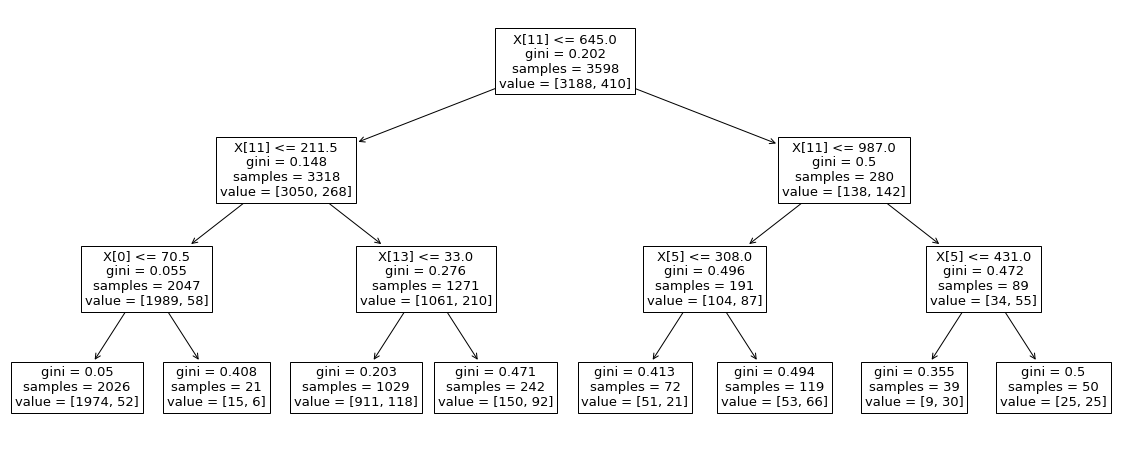

In [52]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize = (20,8))
tree.plot_tree(model1)

fig.savefig('imagename1.png')